Using TensorFlow backend.


Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 1s 2ms/step - loss: 0.1627 - val_loss: 0.0426
Epoch 2/200
760/760 [==============================] - 1s 697us/step - loss: 0.0424 - val_loss: 0.0221

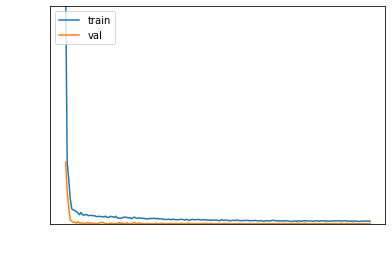

In [1]:
import time_series_numerical_predictor as predictor
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

look_back = 40

# 데이터셋 생성
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

x_train, y_train = predictor.create_dataset(train, look_back)
x_val, y_val = predictor.create_dataset(val, look_back)
x_test, y_test = predictor.create_dataset(test, look_back)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 모델 구성
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

# 모델 학습과정 설정
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

Train Score:  0.0003044863388104683
Validataion Score:  0.0003052221249794861
Test Score:  0.0003052221249794861


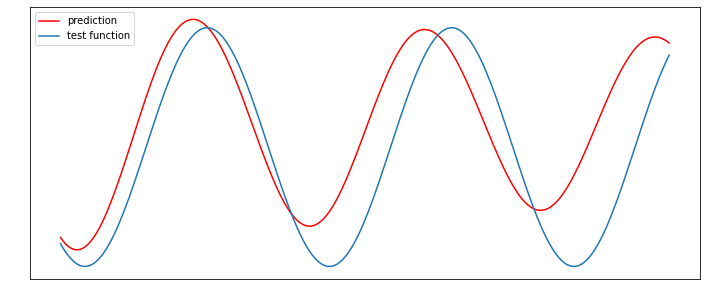

In [2]:
# 학습 과정 출력
predictor.show_model_learning_process(hist.history['loss'], hist.history['val_loss'])

# 모델 평가
predictor.evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test)

# 모델 사용
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])

predictor.print_used_model(y_test, look_ahead, predictions)